Na vytištění součástky na 3D tiskárně je potřeba $k$ metrů tiskové struny. Na tiskové struně se náhodně vyskytují vady, které způsobí ucpání trysky. Průměrná vzdálenost mezi vadami je $v$ metrů. Dojde-li během tisku k ucpání trysky, je tisk ukončen a součástka se tiskne celá znovu. Kolik materiálu se průměrě spotřebuje na vytištění jedné součástky (včetně neúspšných pokusů)? 

Předpokládáme, že výskyt vad na tiskové struně má charakter Poissonova procesu. Vzdálenosti mezi po sobě jdoucími vadami jsou proto vzájemně nezávislé náhodné celičiny s exponenciálním rozdělením se stř. hodnotou $1/v$.

K řešení použijeme metodu Monte Carlo. 

<br>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import expon, norm

In [3]:
k = 40  # spotřeba
v = 60  # průměrná vzdálenost mezi vadami


In [4]:
# MC
N = 100000 # počet iterací MC
L = np.zeros(N)    # simulované hodnoty spotřeby na úsěšný výtisk
E = expon(scale=v)
for i in range(N):
    while True:
        t = E.rvs()  
        if t<=k: # tisk nebyl dokoncen => spotrebu zvysime o mnozstvi materialu spotrebovane do okamziku poruchy 
            L[i] = L[i]+t
        else:    # tisk byl dokoncen => spotrebu zvysime o mnozstvi materialu spotrebovane na tisk soucastky
            L[i] = L[i]+k
            break


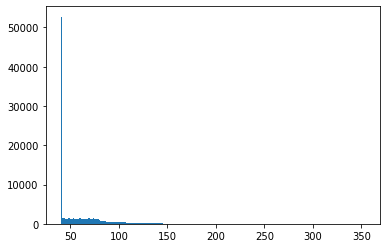

In [10]:
plt.hist(L, bins=200);

In [12]:
m = np.mean(L)   # výběrový průměr
s = np.std(L)    # výběrová směrodatná odchylka (odhad sm. odchylky) jedné spotřeby


In [33]:
alfa = 0.05
q = norm.ppf(1-alfa/2)  # (1-alfa/2)-kvantil N(0, 1)
s_N = s/np.sqrt(N)   # přibližná směrodatná odchylka průměru
d = m-s_N*q          # dolní mez +98
h = m+s_N*q          # horní mez

print("\n")
print("Odhad střední hodnoty spotřeby mnateriálu: I \u2248 {:.3f} m".format(m))
print("\n")
print("P(I \u2208 <{:.3f}, {:.3f}>) = {}".format(d, h, 1-alfa))
print("\n")




Odhad střední hodnoty spotřeby mnateriálu: I ≈ 56.880 m


P(I ∈ <56.715, 57.045>) = 0.95


